# VRCC - Stimulus Pre-rating - Data Analysis

*Pawel Motyka, Felix Klotzsche, Aleksander Molak*


pmotyka@psych.pan.pl, 
klotzsche@cbs.mpg.de, 
alex@lespire.io

___
Analysis of the data from the online study for pre-rating the stimulus models.
___

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy
import scipy.stats as stats

## Create plot for Supplementary Material

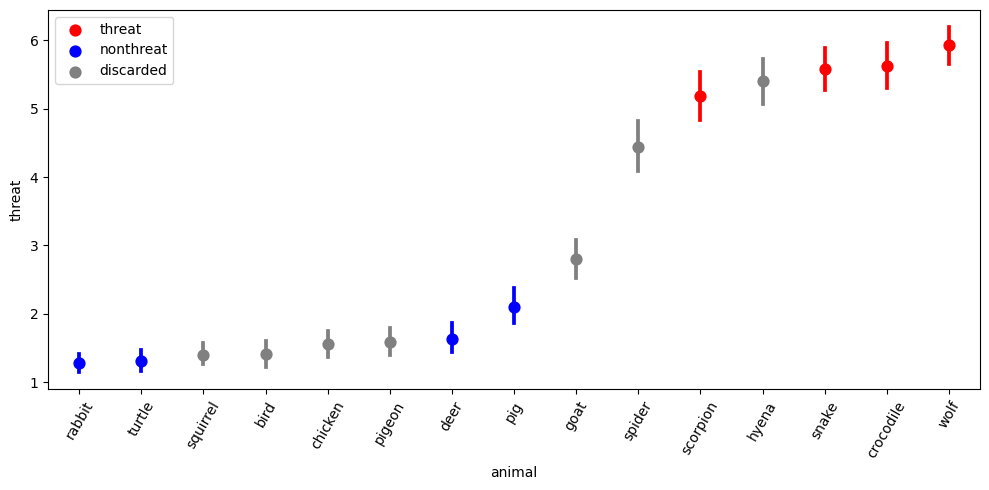

In [4]:
# Read in the data
path = r'../../../../Data/VRTask/Ratings'
file = r'Results-Prerating-Online.csv'
data = pd.read_csv(fr'{path}\{file}', sep=';')

colnames = data.columns.tolist() # get column names
for s in ['threat', 'disgust', 'fast']:
    colnames_o = [c for c in colnames if s in c] # get threat columns
    data.rename(columns={c: s + '_' + data[c][0].lower() for c in colnames_o}, inplace=True) # rename column
data['rowid'] = data.index
# remove first row
data = data.iloc[1:]
data_c = pd.wide_to_long(data, 
                stubnames=['threat', 'disgust', 'fast'],
                i="ID",
                j="animal",
                sep='_',
                suffix='\w+').sort_values(by=['ID', 'animal']).reset_index()
# change dtype of threat, disgust, fast to int
data_c['threat'] = data_c['threat'].astype(int)
data_c['disgust'] = data_c['disgust'].astype(int)
data_c['fast'] = data_c['fast'].astype(int)
data_c['animal'] = data_c['animal'].replace({'doe': 'deer'})

# add column "group" to data_c, set group to "threat" if animal is in ['crocodile', 'wolf', 'snake', scorpion'], to "nonthreat" if animal is in ['cpig', 'rabbit', 'goat', 'turtle'] and to 'discarded' otherwise
data_c['group'] = (data_c['animal']
                    .apply(lambda x: 'threat' if x in ['crocodile', 'wolf', 'snake', 'scorpion'] else 'nonthreat' if x in ['pig', 'rabbit', 'deer', 'turtle'] else 'discarded')
                    )




# plot threat as a function of animal, show mean plus CI, use pointplot, sort increasing, do not connect points, rotate xticks by 60 degrees
fig, ax = plt.subplots(figsize=(10, 5))
(sns.pointplot(
    x='animal', y='threat', hue='group', data=data_c, errorbar='ci', join=False, 
    order=(data_c.groupby('animal')['threat']
                .mean()
                .sort_values()
                .index
           ), palette={'threat': 'red',
                       'nonthreat': 'blue', 'discarded': 'grey'},
    ax=ax)
    
    .set_xticklabels((data_c.groupby('animal')['threat']
                            .mean()
                            .sort_values()
                            .index),
                      rotation=60)
)
# reorder legend entries to the sequence threat, nonthreat, discarded
handles, labels = ax.get_legend_handles_labels()
# find positions of 'threat', 'nonthreat', 'discarded' in labels
threat_pos = labels.index('threat')
nonthreat_pos = labels.index('nonthreat')
discarded_pos = labels.index('discarded')
# reorder handles and labels
ax.legend(handles=[handles[i] for i in [threat_pos, nonthreat_pos, discarded_pos]],
          labels=[labels[i] for i in [threat_pos, nonthreat_pos, discarded_pos]])

# cut white space
plt.tight_layout()

# save as PDF:
fpath = r'../../../../Figures/Supplementary/Fig. S1.pdf'
plt.savefig(fpath)
# save as PNG
fpath = fpath.replace('.pdf', '.png')
plt.savefig(fpath)

## Read-in and examine the data

In [10]:
# Change plotting style 
plt.style.use('fivethirtyeight')

# Read same data in sligthly different format
data = pd.read_csv(fr'{path}\{file}', sep=';' , header=[0,1])

In [11]:
data

,pořadí,ID,Native language,Age,Sex,Years of education,Please rate how threatening the presented animal is to you.,Please rate how disgusting the presented animal is to you.,Please rate how fast the presented animal can move towards you.,Please rate how threatening the presented animal is to you.,...,Please rate how fast the presented animal can move towards you.,Please rate how threatening the presented animal is to you.,Please rate how disgusting the presented animal is to you.,Please rate how fast the presented animal can move towards you.,Please rate how threatening the presented animal is to you.,Please rate how disgusting the presented animal is to you.,Please rate how fast the presented animal can move towards you.,Please rate how threatening the presented animal is to you.,Please rate how disgusting the presented animal is to you.,Please rate how fast the presented animal can move towards you.
,Unnamed: 0_level_1,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1,Spider,Spider,Spider,Chicken,...,Snake,Scorpion,Scorpion,Scorpion,Squirrel,Squirrel,Squirrel,Bird,Bird,Bird
0,1,21871,"English,Polish",18,Female,12,1,1,1,1,...,5,2,2,2,2,3,1,1,1,1
1,2,21866,Polish,32,Female,21,6,7,7,1,...,4,5,5,5,1,1,4,1,1,4
2,3,21863,Polish,26,Male,17,4,7,6,1,...,6,4,4,4,1,1,5,1,1,3
3,4,21861,"English,Polish",24,Female,18,6,6,7,1,...,6,7,6,5,2,1,5,1,1,5
4,5,21860,Polish,29,Male,19,1,1,6,1,...,6,1,1,6,1,1,6,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,90,21666,Polish,40,Female,16,4,5,7,4,...,7,6,6,6,2,1,5,4,4,5
90,91,21661,"German,English",27,Male,16,6,7,7,1,...,6,7,6,5,2,1,5,1,2,5
91,92,21657,"English,Romanian",24,Female,17,4,2,7,2,...,6,6,2,5,2,1,7,6,6,7


In [3]:
data.columns

MultiIndex([(                                                         'pořadí', ...),
            (                                                             'ID', ...),
            (                                                'Native language', ...),
            (                                                            'Age', ...),
            (                                                            'Sex', ...),
            (                                             'Years of education', ...),
            (    'Please rate how threatening the presented animal is to you.', ...),
            (     'Please rate how disgusting the presented animal is to you.', ...),
            ('Please rate how fast the presented animal can move towards you.', ...),
            (    'Please rate how threatening the presented animal is to you.', ...),
            (     'Please rate how disgusting the presented animal is to you.', ...),
            ('Please rate how fast the presented anima

In [4]:
data.head()

,pořadí,ID,Native language,Age,Sex,Years of education,Please rate how threatening the presented animal is to you.,Please rate how disgusting the presented animal is to you.,Please rate how fast the presented animal can move towards you.,Please rate how threatening the presented animal is to you.,...,Please rate how fast the presented animal can move towards you.,Please rate how threatening the presented animal is to you.,Please rate how disgusting the presented animal is to you.,Please rate how fast the presented animal can move towards you.,Please rate how threatening the presented animal is to you.,Please rate how disgusting the presented animal is to you.,Please rate how fast the presented animal can move towards you.,Please rate how threatening the presented animal is to you.,Please rate how disgusting the presented animal is to you.,Please rate how fast the presented animal can move towards you.
,Unnamed: 0_level_1,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1,Spider,Spider,Spider,Chicken,...,Snake,Scorpion,Scorpion,Scorpion,Squirrel,Squirrel,Squirrel,Bird,Bird,Bird
0,1,21871,"English,Polish",18,Female,12,1,1,1,1,...,5,2,2,2,2,3,1,1,1,1
1,2,21866,Polish,32,Female,21,6,7,7,1,...,4,5,5,5,1,1,4,1,1,4
2,3,21863,Polish,26,Male,17,4,7,6,1,...,6,4,4,4,1,1,5,1,1,3
3,4,21861,"English,Polish",24,Female,18,6,6,7,1,...,6,7,6,5,2,1,5,1,1,5
4,5,21860,Polish,29,Male,19,1,1,6,1,...,6,1,1,6,1,1,6,1,1,7


* ## Explore the data

<AxesSubplot:>

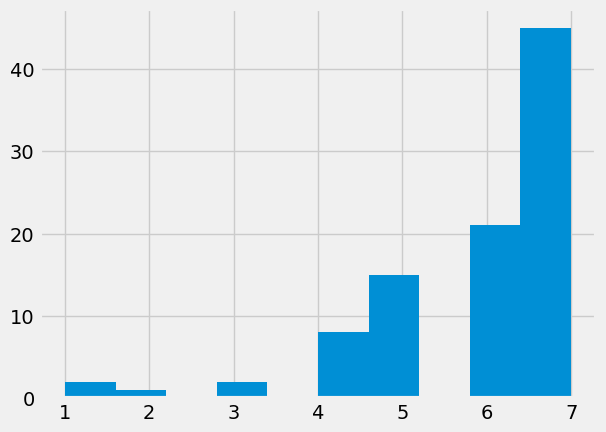

In [5]:
data['Please rate how threatening the presented animal is to you.']['Wolf'].hist()

<AxesSubplot:>

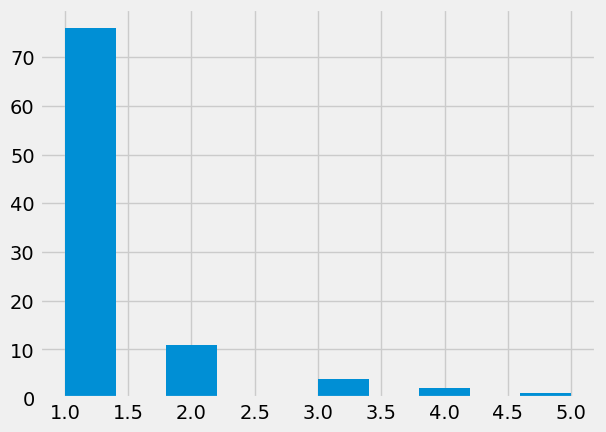

In [6]:
data['Please rate how threatening the presented animal is to you.']['Turtle'].hist()

<AxesSubplot:>

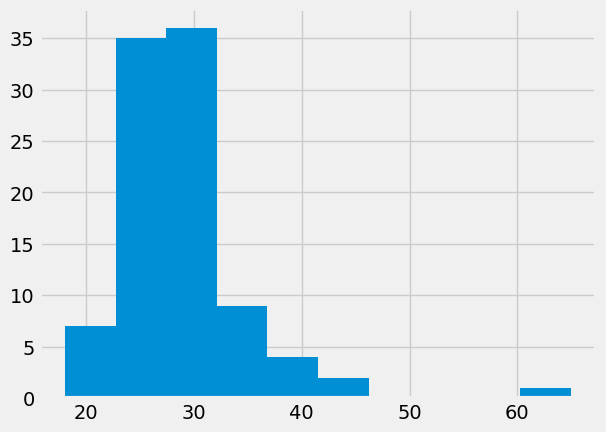

In [7]:
data.Age['Unnamed: 3_level_1'].hist()

 Female    61
 Male      33
Name: Unnamed: 4_level_1, dtype: int64
94


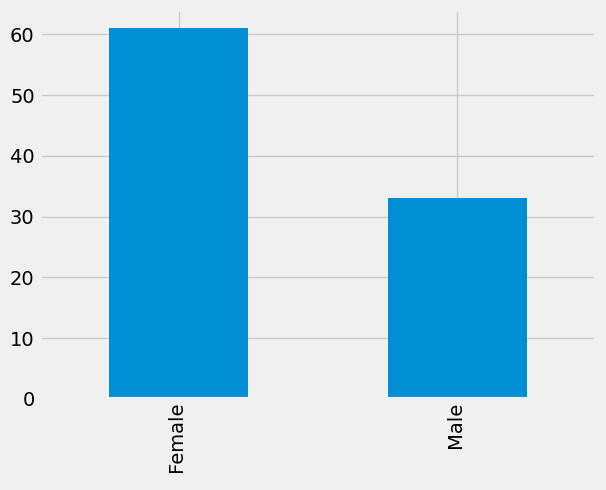

In [8]:
data.Sex['Unnamed: 4_level_1'].value_counts().plot(kind='bar')
print(data.Sex['Unnamed: 4_level_1'].value_counts())
print(data.shape[0])

<AxesSubplot:>

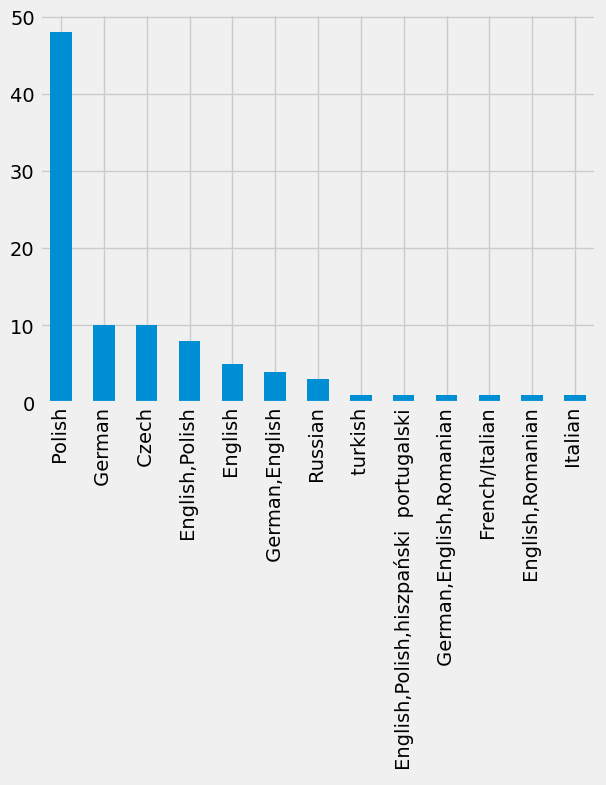

In [9]:
data['Native language']['Unnamed: 2_level_1'].value_counts().plot(kind='bar')

<AxesSubplot:>

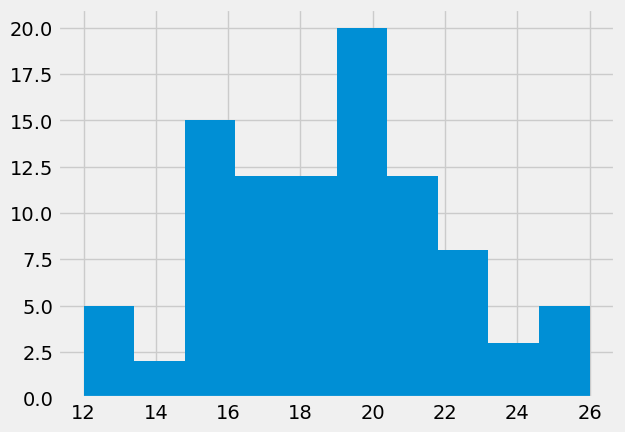

In [10]:
data['Years of education']['Unnamed: 5_level_1'].hist()

In [11]:
age = data.Age['Unnamed: 3_level_1']
print(f'AGE\nMean: {age.mean():.2f}\nStd: {age.std():.2f}\nRange: {age.min()} - {age.max()}')

AGE
Mean: 29.01
Std: 5.95
Range: 18 - 65


In [12]:
data.columns

MultiIndex([(                                                         'pořadí', ...),
            (                                                             'ID', ...),
            (                                                'Native language', ...),
            (                                                            'Age', ...),
            (                                                            'Sex', ...),
            (                                             'Years of education', ...),
            (    'Please rate how threatening the presented animal is to you.', ...),
            (     'Please rate how disgusting the presented animal is to you.', ...),
            ('Please rate how fast the presented animal can move towards you.', ...),
            (    'Please rate how threatening the presented animal is to you.', ...),
            (     'Please rate how disgusting the presented animal is to you.', ...),
            ('Please rate how fast the presented anima

* ## Prepare analysis pipeline

In [13]:
# Questions -> variables
disgust = 'Please rate how disgusting the presented animal is to you.'
speed = 'Please rate how fast the presented animal can move towards you.'
threat = 'Please rate how threatening the presented animal is to you.'

In [14]:
data[threat].shape

(94, 15)

* #### Build dicts with mean feature values per animal

In [15]:
threat_dict = {}
for i, col in enumerate(data[threat].columns):
#     print(f'{i:02} {col:9} {data[threat][col].mean():7.03f}')
    threat_dict[col] = data[threat][col].mean()

In [16]:
disgust_dict = {}
for i, col in enumerate(data[disgust].columns):
#     print(f'{i:02} {col:9} {data[disgust][col].mean():7.03f}')
    disgust_dict[col] = data[disgust][col].mean()

In [17]:
speed_dict = {}
for i, col in enumerate(data[speed].columns):
#     print(f'{i:02} {col:9} {data[speed][col].mean():7.03f}')
    speed_dict[col] = data[speed][col].mean()

* #### Build a sortng function

In [18]:
def sort_dict(d):
    return [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]

In [19]:
sort_dict(threat_dict)

[('Wolf', 5.9361702127659575),
 ('Crocodile', 5.627659574468085),
 ('Snake', 5.585106382978723),
 ('Hyena', 5.404255319148936),
 ('Scorpion', 5.191489361702128),
 ('Spider', 4.446808510638298),
 ('Goat', 2.8085106382978724),
 ('Pig', 2.106382978723404),
 ('Doe', 1.6382978723404256),
 ('Pigeon', 1.5851063829787233),
 ('Chicken', 1.553191489361702),
 ('Bird', 1.4148936170212767),
 ('Squirrel', 1.4042553191489362),
 ('Turtle', 1.3085106382978724),
 ('Rabbit', 1.2765957446808511)]

In [20]:
sort_dict(disgust_dict)

[('Spider', 4.26595744680851),
 ('Scorpion', 3.8191489361702127),
 ('Snake', 3.6808510638297873),
 ('Pigeon', 2.6914893617021276),
 ('Crocodile', 2.6382978723404253),
 ('Pig', 2.382978723404255),
 ('Wolf', 2.3404255319148937),
 ('Hyena', 2.202127659574468),
 ('Goat', 1.8829787234042554),
 ('Chicken', 1.7553191489361701),
 ('Turtle', 1.425531914893617),
 ('Bird', 1.3404255319148937),
 ('Rabbit', 1.202127659574468),
 ('Squirrel', 1.127659574468085),
 ('Doe', 1.0957446808510638)]

In [21]:
sort_dict(speed_dict)

[('Wolf', 5.882978723404255),
 ('Hyena', 5.6063829787234045),
 ('Spider', 5.5212765957446805),
 ('Snake', 5.5),
 ('Squirrel', 5.148936170212766),
 ('Doe', 4.840425531914893),
 ('Crocodile', 4.819148936170213),
 ('Goat', 4.787234042553192),
 ('Rabbit', 4.723404255319149),
 ('Scorpion', 4.691489361702128),
 ('Bird', 4.670212765957447),
 ('Pigeon', 4.446808510638298),
 ('Chicken', 3.8191489361702127),
 ('Pig', 3.617021276595745),
 ('Turtle', 1.7234042553191489)]

In [22]:
# Get lists of the most and the least threatening animals
most_threat = [x[0] for x in sort_dict(threat_dict) if sort_dict(threat_dict).index(x)<4]
least_threat = [x[0] for x in sort_dict(threat_dict) if sort_dict(threat_dict).index(x)>10]

In [23]:
def generate_hists(mean_dict, source, feature, feat_name):
    for i in mean_dict:
        animal = data[feature][i]
        plt.hist(animal, alpha=.5)
        plt.title(f'{feat_name.capitalize()}: {i}\nμ = {source[i]:02.2f}')
    #     plt.text(0,0, f'mean threat = {threat_dict[i]:02.3f}', 
    #              horizontalalignment='center',
    #              verticalalignment='center',
    #             alpha=.5)
        plt.xlabel('Rating', fontsize=10, alpha=.3)
        plt.ylabel('Frequency', fontsize=10, alpha=.3)
        plt.show()

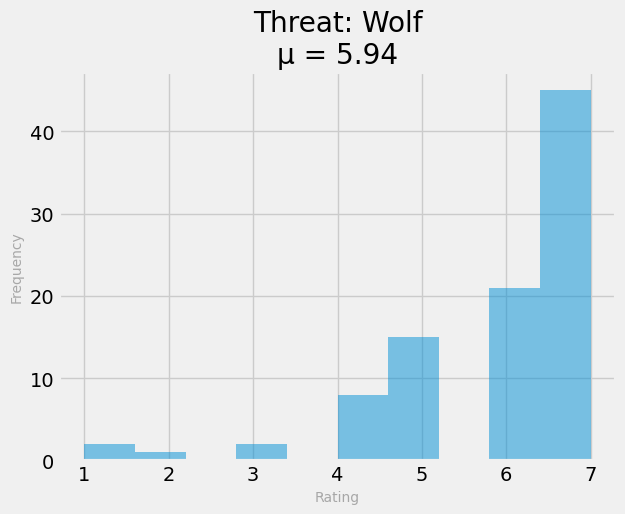

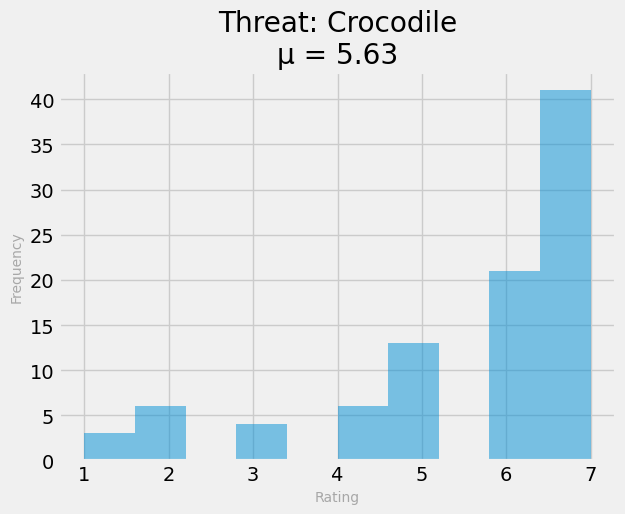

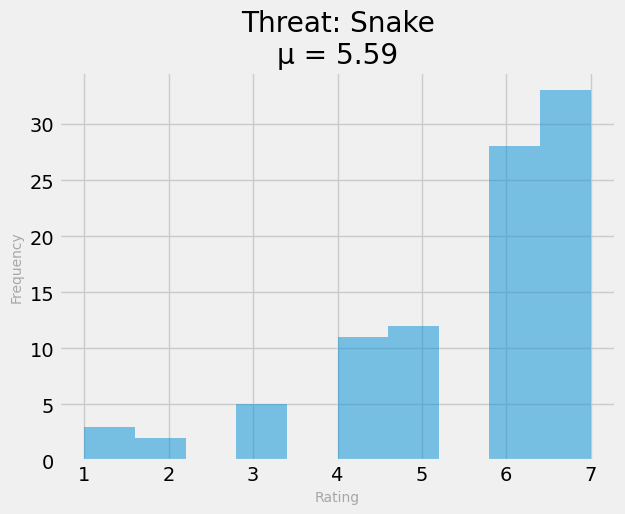

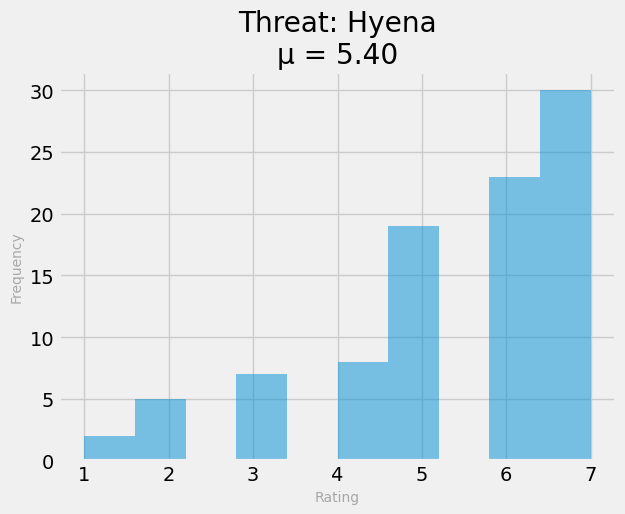

In [24]:
generate_hists(most_threat, threat_dict, threat, 'threat')

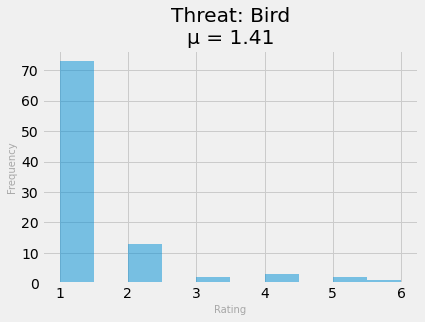

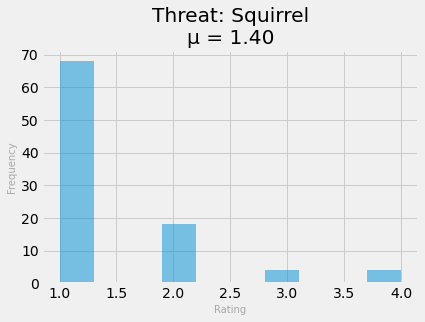

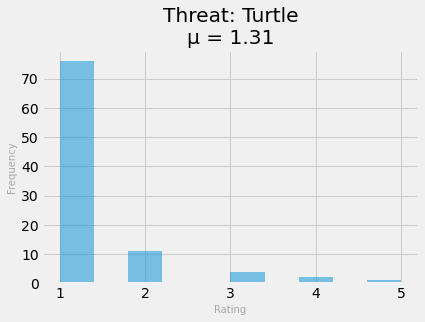

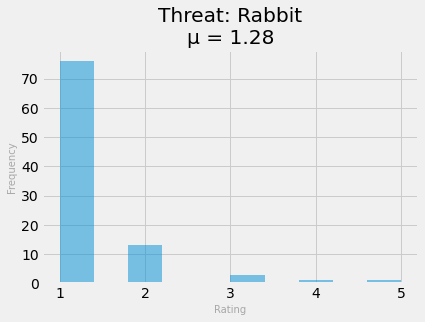

In [26]:
generate_hists(least_threat, threat_dict, threat, 'threat')

* ### Build mean features data frame

In [25]:
stimuli_feats = pd.DataFrame(
    {'Threat': threat_dict, 'Disgust': disgust_dict, 'Speed': speed_dict})

In [26]:
stimuli_feats.sort_values('Threat', ascending=False)

,Threat,Disgust,Speed
Wolf,5.936170,2.340426,5.882979
Crocodile,5.627660,2.638298,4.819149
Snake,5.585106,3.680851,5.500000
Hyena,5.404255,2.202128,5.606383
Scorpion,5.191489,3.819149,4.691489
Spider,4.446809,4.265957,5.521277
Goat,2.808511,1.882979,4.787234
Pig,2.106383,2.382979,3.617021
Doe,1.638298,1.095745,4.840426
Pigeon,1.585106,2.691489,4.446809


In [27]:
# Corelation matrix
cor_mtrx = stimuli_feats.corr(method='spearman')

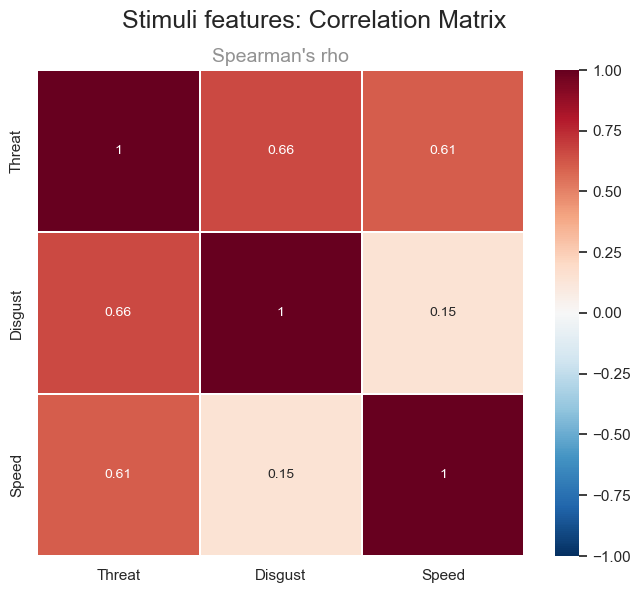

In [28]:
sns.set(font_scale=1.0)
plt.figure(figsize=(7,6))
sns.heatmap(cor_mtrx, linewidths=0.1, cmap="RdBu_r", vmin=-1, vmax=1, 
            annot=True, annot_kws={'size':10})
plt.title("Spearman's rho", fontsize=14, alpha=.5)
plt.suptitle('Stimuli features: Correlation Matrix     ', fontsize=18)
plt.show()

In [29]:
# Test for feat corr significance
stats.spearmanr(stimuli_feats)[1]

array([[0.        , 0.00733057, 0.01638131],
       [0.00733057, 0.        , 0.60254992],
       [0.01638131, 0.60254992, 0.        ]])

In [30]:
comparisons = [['Wolf', ('Goat', 'Pig', 'Doe')], 
               ['Snake', ('Turtle', 'Chicken', 'Rabbit')], 
               ['Crocodile', ('Goat', 'Pig', 'Doe')],
               ['Scorpion', ('Squirrel', 'Bird', 'Pigeon', 'Chicken', 'Rabbit')],
               ['Spider', ('Squirrel', 'Bird', 'Pigeon', 'Chicken', 'Rabbit')],
               ['Hyena', ('Goat', 'Pig', 'Doe')]]

In [31]:
stimuli_feats.loc[comparisons[0][1][1]]

Threat     2.106383
Disgust    2.382979
Speed      3.617021
Name: Pig, dtype: float64

In [35]:
print('T-tests (independent) for all pairs / all features')
print('for the `new` data (n=94) [14.02.2019]')
print('\n-------------------')

for c in comparisons:
    for non_th in c[1]:
        # Print animal names
        print(f'\n{c[0]} vs {non_th}')
        
        # Get means
        t_thrt_mean = data[threat][c[0]].mean()
        nt_thrt_mean = data[threat][non_th].mean()
        
        t_dsgst_mean = data[disgust][c[0]].mean()
        nt_dsgst_mean = data[disgust][non_th].mean()
        
        t_speed_mean = data[speed][c[0]].mean()
        nt_speed_mean = data[speed][non_th].mean()
        
        # Perform t-test for threat, disgust, speed
        t_threat = stats.ttest_ind(data[threat][c[0]], data[threat][non_th])
        t_disgust = stats.ttest_ind(data[disgust][c[0]], data[disgust][non_th])
        t_speed = stats.ttest_ind(data[speed][c[0]], data[speed][non_th])
        
        # Print results
        print('\nThreat')
        print(f'μ = {t_thrt_mean:.2f} vs {nt_thrt_mean:.2f}')
        print(f'p-val: {t_threat[1]:.3f}')
        
        print('\nDisgust')
        print(f'μ = {t_dsgst_mean:.2f} vs {nt_dsgst_mean:.2f}')
        print(f'p-val: {t_disgust[1]:.3f}')
        
        print('\nSpeed')
        print(f'μ = {t_speed_mean:.2f} vs {nt_speed_mean:.2f}')
        print(f'p-val: {t_speed[1]:.3f}')
        print('\n-------------------')

T-tests (independent) for all pairs / all features
for the `new` data (n=94) [14.02.2019]

-------------------

Wolf vs Goat

Threat
μ = 5.94 vs 2.81
p-val: 0.000

Disgust
μ = 2.34 vs 1.88
p-val: 0.023

Speed
μ = 5.88 vs 4.79
p-val: 0.000

-------------------

Wolf vs Pig

Threat
μ = 5.94 vs 2.11
p-val: 0.000

Disgust
μ = 2.34 vs 2.38
p-val: 0.842

Speed
μ = 5.88 vs 3.62
p-val: 0.000

-------------------

Wolf vs Doe

Threat
μ = 5.94 vs 1.64
p-val: 0.000

Disgust
μ = 2.34 vs 1.10
p-val: 0.000

Speed
μ = 5.88 vs 4.84
p-val: 0.000

-------------------

Snake vs Turtle

Threat
μ = 5.59 vs 1.31
p-val: 0.000

Disgust
μ = 3.68 vs 1.43
p-val: 0.000

Speed
μ = 5.50 vs 1.72
p-val: 0.000

-------------------

Snake vs Chicken

Threat
μ = 5.59 vs 1.55
p-val: 0.000

Disgust
μ = 3.68 vs 1.76
p-val: 0.000

Speed
μ = 5.50 vs 3.82
p-val: 0.000

-------------------

Snake vs Rabbit

Threat
μ = 5.59 vs 1.28
p-val: 0.000

Disgust
μ = 3.68 vs 1.20
p-val: 0.000

Speed
μ = 5.50 vs 4.72
p-val: 0.000

-------